# Problem Statement

## Find a model that can predict the median price of houses based on other features in the 'housing.csv' data set. 

In [105]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Loading the data set

In [106]:
df = pd.read_csv('housing.csv')

In [107]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [109]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Preprocessing

In [3]:
# Plot the histogram for different columns. 
# What are your observations ? 
# Are there any intersting insights that you can use from the histogram to improve your model later ?

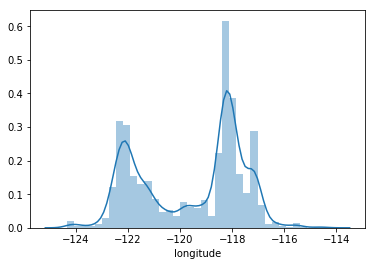

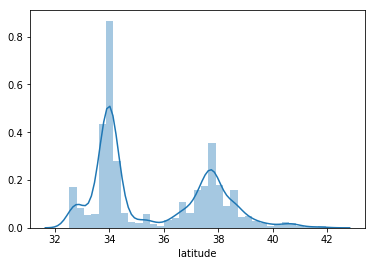

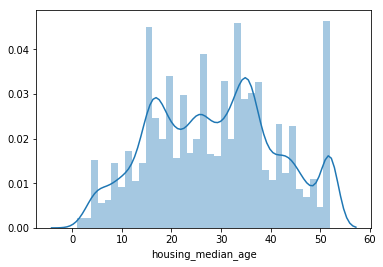

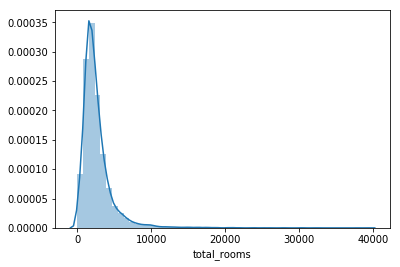

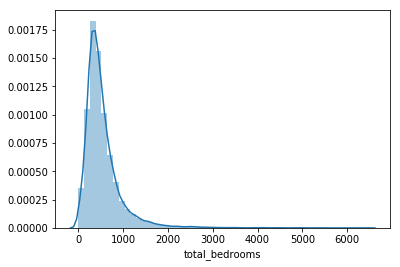

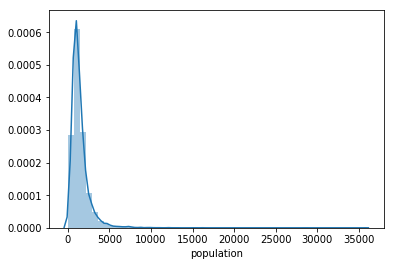

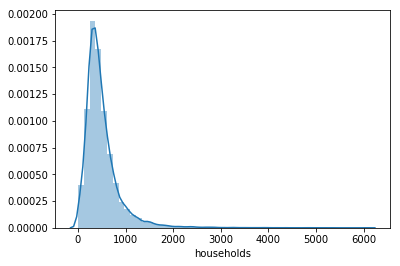

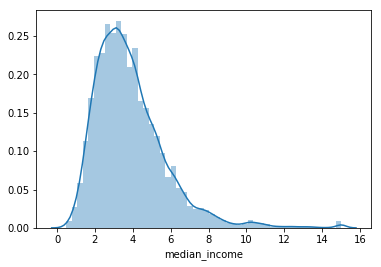

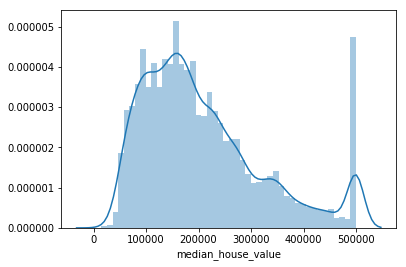

In [111]:
for i, col in enumerate(df.columns[:-1]):
    plt.figure(i)
    sns.distplot(df[col].dropna())

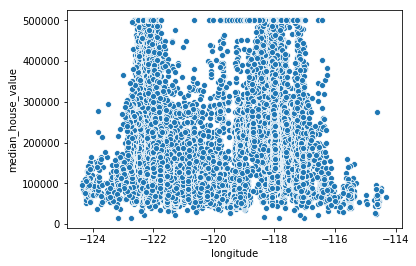

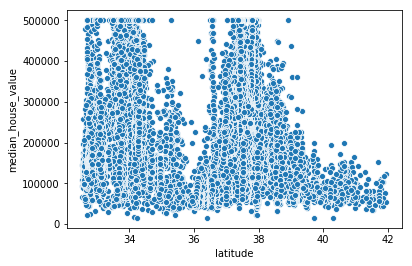

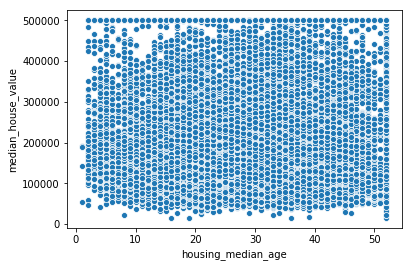

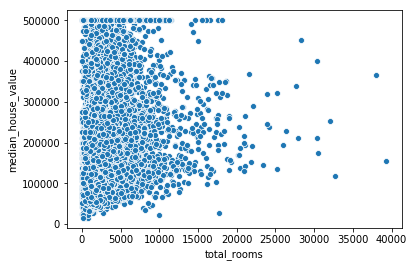

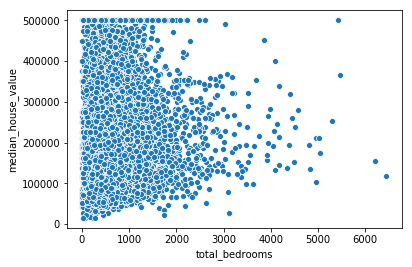

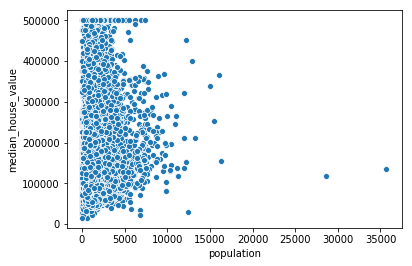

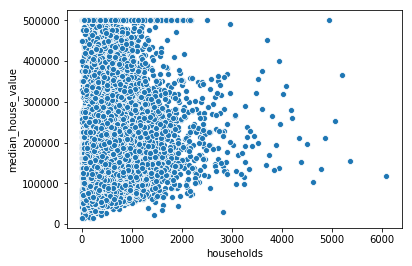

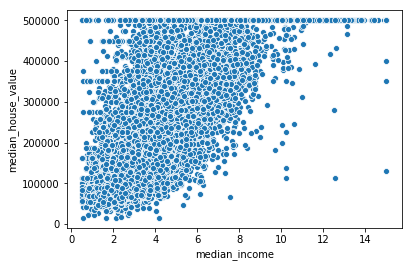

In [114]:
for i, col in enumerate(df.columns[:-2]):
    plt.figure(i)
    sns.scatterplot(x=df[col].dropna(), y="median_house_value", data=df)

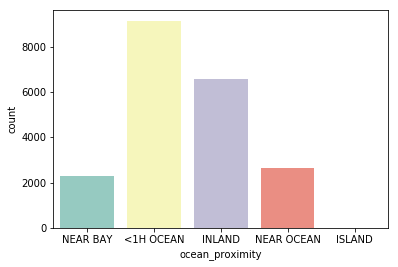

In [115]:
sns.countplot(x="ocean_proximity", data=df, palette="Set3")

In [4]:
# Apply a transformation to the numerical columns so they all have mean of 0 and variance of 1.

In [117]:
df_num = df.iloc[:, :-1]
n_df=(df_num-df_num.min())/(df_num.max()-df_num.min())
n_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.476125,0.328572,0.541951,0.066986,0.083313,0.039869,0.081983,0.232464,0.395579
std,0.199555,0.226988,0.246776,0.055486,0.065392,0.031740,0.062873,0.131020,0.237928
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253984,0.147715,0.333333,0.036771,0.045779,0.021974,0.045881,0.142308,0.215671
50%,0.583665,0.182784,0.549020,0.054046,0.067349,0.032596,0.067094,0.209301,0.339588
75%,0.631474,0.549416,0.705882,0.080014,0.100248,0.048264,0.099326,0.292641,0.514897
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# The 'ocean_proximity' column is text. Modify it so you can use it as a numerical feature. 
# Your new dataframe should consist of all the previous numerical columns as well as the new modified features for the "ocean_proximity" column.

In [139]:
label_encoder = LabelEncoder()
encoded = label_encoder.fit_transform(df['ocean_proximity'])
normalized_ocean=(encoded-encoded.min())/(encoded.max()-encoded.min())

In [138]:
n_df['ocean_proximity'] = pd.Series(normalized_ocean, index=n_df.index)
n_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.476125,0.328572,0.541951,0.066986,0.083153,0.039869,0.081983,0.232464,0.395579,0.291461
std,0.199555,0.226988,0.246776,0.055486,0.065083,0.031740,0.062873,0.131020,0.237928,0.355166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253984,0.147715,0.333333,0.036771,0.045934,0.021974,0.045881,0.142308,0.215671,0.000000
50%,0.583665,0.182784,0.549020,0.054046,0.067349,0.032596,0.067094,0.209301,0.339588,0.250000
75%,0.631474,0.549416,0.705882,0.080014,0.099666,0.048264,0.099326,0.292641,0.514897,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Identify which column has missing values. What is your strategy for dealing with those values ?

In [135]:
n_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [136]:
n_df['total_bedrooms'] = n_df['total_bedrooms'].fillna(n_df['total_bedrooms'].median())

In [137]:
n_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# Training  and Performance Evaluation

In [7]:
# Choose a random forest regressor with default parameters to perform training on the data. Use 10-fold Cross Validation. 
# Set the total number of trees in the forest to be 10.
# Choose the proper metric to evaluate the accuracy of your model. 

In [56]:
h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_201"; Java(TM) SE Runtime Environment (build 1.8.0_201-b09); Java HotSpot(TM) 64-Bit Server VM (build 25.201-b09, mixed mode)
  Starting server from /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/kt/l2dk26xn48g5z_32l6dzcjmh0000gn/T/tmpphbye6h7
  JVM stdout: /var/folders/kt/l2dk26xn48g5z_32l6dzcjmh0000gn/T/tmpphbye6h7/h2o_lijiahuan_started_from_python.out
  JVM stderr: /var/folders/kt/l2dk26xn48g5z_32l6dzcjmh0000gn/T/tmpphbye6h7/h2o_lijiahuan_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.3
H2O cluster version age:,1 month and 11 days
H2O cluster name:,H2O_from_python_lijiahuan_vqkyl2
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [140]:
h2o_df = H2OFrame(n_df)
h2o_df.summary()

Parse progress: |█████████████████████████████████████████████████████████| 100%


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
type,real,real,real,real,real,real,real,real,real,real
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,0.47612505404737676,0.3285718846023957,0.5419507143942857,0.06698619160169238,0.0831531434806259,0.03986873915149093,0.08198317385833834,0.23246375932104293,0.39557943453617844,0.2914607558139551
maxs,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
sigma,0.19955495254009897,0.226987502386515,0.24677563945316985,0.05548642483297207,0.06508253847326013,0.03174029882466828,0.06287284210353748,0.13102038026684207,0.23792812374879663,0.3551656181547035
zeros,1,1,4,1,1,1,1,12,4,9136
missing,0,0,0,0,0,0,0,0,0,0
0,0.21115537848605495,0.5674814027630182,0.7843137254901961,0.02233073910168371,0.019863438857852266,0.008940833543541018,0.020555829633284,0.5396684183666433,0.9022663824066705,0.75
1,0.21215139442231049,0.5653560042507968,0.392156862745098,0.180502568798006,0.17147734326505276,0.06721040387903249,0.18697582634435125,0.5380270616957007,0.7082465639316952,0.75
2,0.21015936254980092,0.5642933049946866,1.0,0.03726028790884582,0.029329608938547486,0.013817651840017936,0.028942608123663872,0.4660280547854512,0.6950507420587956,0.75


In [141]:
x = [col for col in h2o_df.columns if 'median_house_value' not in col]
y = 'median_house_value'
m = H2ORandomForestEstimator(nfolds=10,ntrees=10)
m.train(x,y,h2o_df)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [142]:
actual = h2o_df.as_data_frame()['median_house_value'].values
pred = m.predict(h2o_df).as_data_frame().values
mean_squared_error(actual, pred)

drf prediction progress: |████████████████████████████████████████████████| 100%


0.002236439595180562

In [8]:
# Use the random forest regressor to determine the most important features that impact the prediction accuracy.

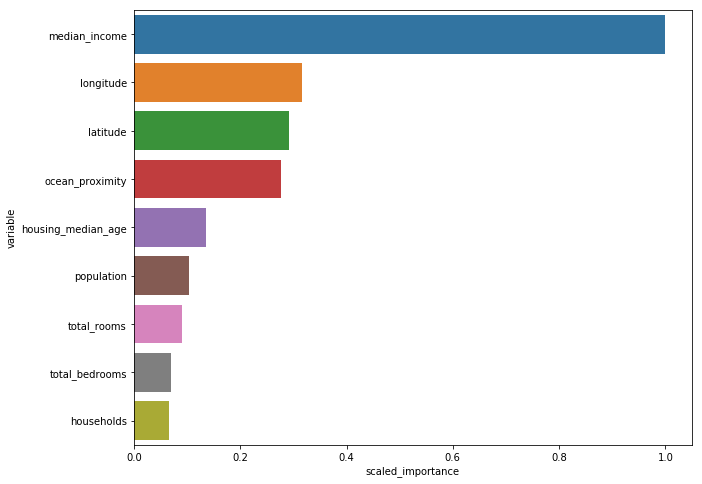

In [143]:
importance = m.varimp(use_pandas=True)
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='scaled_importance', y='variable', data=importance)
plt.show()

In [9]:
# Use a different machine learning approach to find the most important features in the dataset.
# Compare the results with your findings from the random regressor model.

In [144]:
x_data = n_df[x]
y_data = n_df[y].astype('int')

In [150]:
# Univariate Selection
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(x_data,y_data)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_data.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['variable','importance']
featureScores.nlargest(10,'importance')

,variable,importance
7,median_income,323.885635
8,ocean_proximity,25.688749
2,housing_median_age,19.140652
1,latitude,5.738525
5,population,1.949991
3,total_rooms,1.040250
6,households,0.376238
0,longitude,0.371833
4,total_bedrooms,0.370320


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


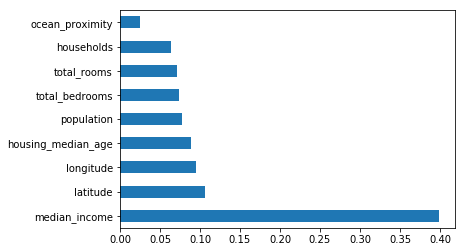

In [151]:
# Feature Importance
model = ExtraTreesClassifier()
model.fit(x_data,y_data)
feat_importances = pd.Series(model.feature_importances_, index=x_data.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

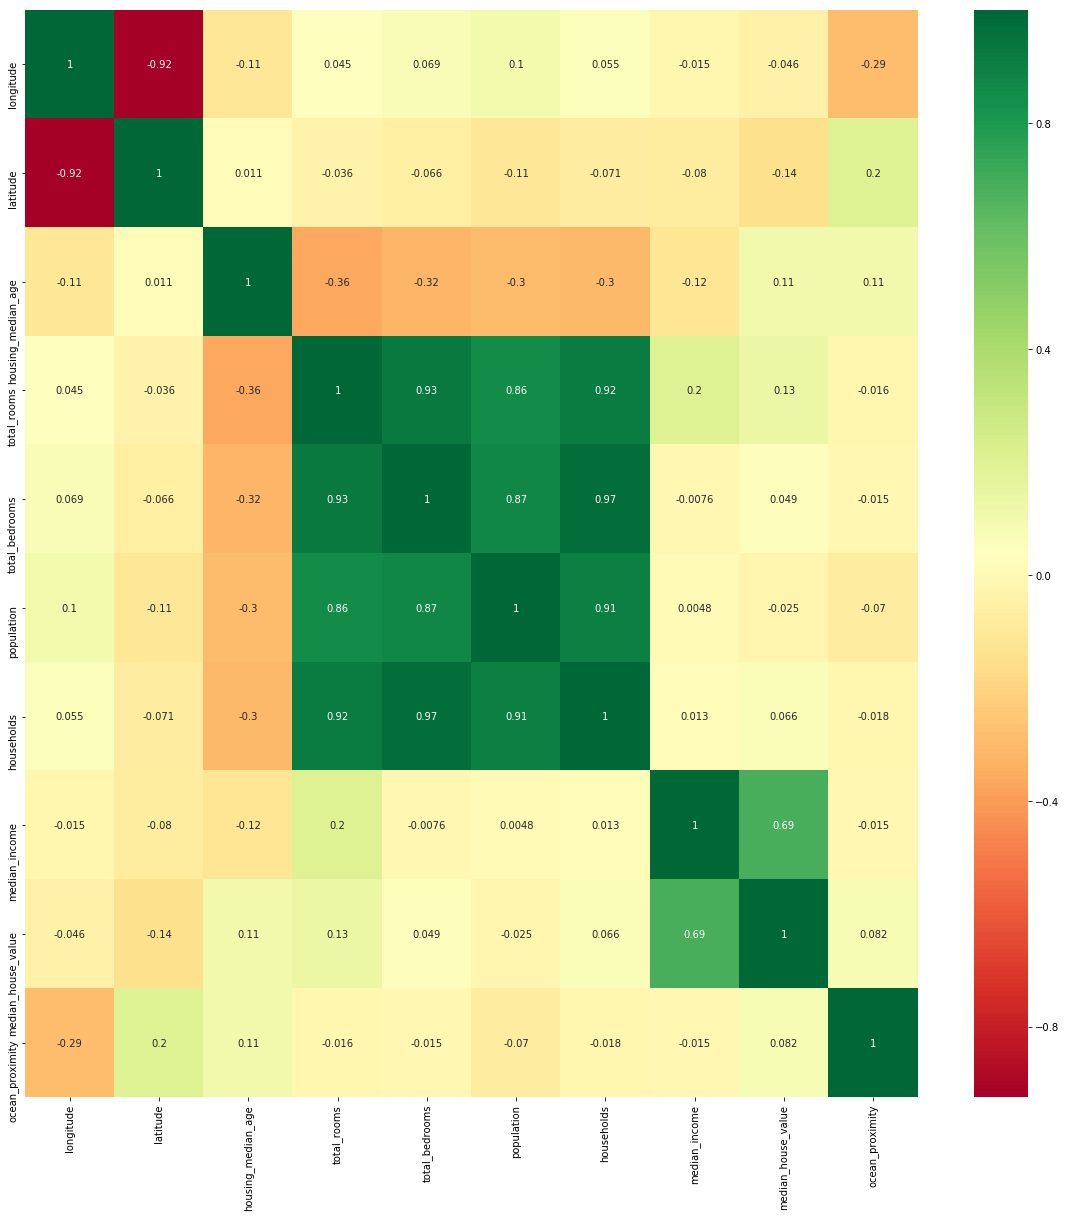

In [152]:
# Correlation Matrix
corrmat = n_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(n_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [10]:
# Fix the total number max depth of the tree  (N) to be 10  and let the max depth of the tree (d) to vary from 2 to 10 in steps of 2 .
# Find out the choice of 'd' that result in the best prediciton accuracy.  (Assume 5 fold cross validation)

drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
drf Model Build progress: |█

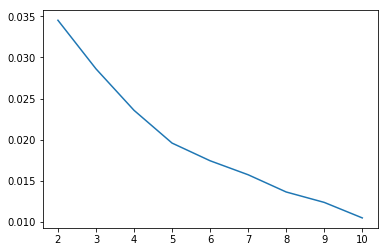

In [154]:
res = []
for i in range(2,11):
    m = H2ORandomForestEstimator(nfolds=5,ntrees=10,max_depth=i)
    m.train(x,y,h2o_df)
    actual = h2o_df.as_data_frame()['median_house_value'].values
    pred = m.predict(h2o_df).as_data_frame().values
    res.append(mean_squared_error(actual, pred))
p = pd.DataFrame(res, index=list(range(2, 11)))
plt.plot(p)